In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer

In [3]:
data_path = 'C:/nlp/tensorflow-ml-nlp-tf2/7.PRETRAIN_METHOD/data_in/KOR/KorNLI/'
op = "C:/nlp/tensorflow-ml-nlp-tf2/7.PRETRAIN_METHOD/data_out/"

In [5]:
multinli_data = pd.read_csv(data_path + 'multinli.train.ko.tsv', sep = '\t', error_bad_lines = False)
multinli_data.head(10)

b'Skipping line 24426: expected 3 fields, saw 4\nSkipping line 156343: expected 3 fields, saw 4\nSkipping line 218766: expected 3 fields, saw 4\nSkipping line 232318: expected 3 fields, saw 4\nSkipping line 253493: expected 3 fields, saw 4\n'
b'Skipping line 265734: expected 3 fields, saw 4\nSkipping line 282588: expected 3 fields, saw 4\nSkipping line 350969: expected 3 fields, saw 4\n'


,sentence1,sentence2,gold_label
0,개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.,제품과 지리학은 크림 스키밍을 작동시키는 것이다.,neutral
1,시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...,사람들이 기억하면 다음 수준으로 물건을 잃는다.,entailment
2,우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.,우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다.,entailment
3,어떻게 아세요? 이 모든 것이 다시 그들의 정보다.,이 정보는 그들의 것이다.,entailment
4,"그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...",테니스화의 가격은 다양하다.,neutral
5,내 워커가 고장나서 지금 화가 났어. 스테레오를 정말 크게 틀어야 해.,나는 내 워크맨이 고장나서 화가 나서 이제 스테레오를 정말 크게 틀어야 한다.,entailment
6,그러나 apse 위에서 살아남은 기독교 모자이크 몇 개는 아기 예수와 함께 성모인데...,기독교 모자이크의 대부분은 이슬람교도들에 의해 파괴되었다.,neutral
7,(슬레이트에 대한 읽기는 잭슨의 연구 결과를 받아들인다.),슬레이트는 잭슨의 발견에 대해 의견을 가지고 있었다.,entailment
8,게이들과 레즈비언들.,이성애자.,contradiction
9,Rue des Francs-Bourgeois의 끝에는 많은 사람들이 돌과 붉은 벽돌...,Place des Vosges는 전적으로 회색 대리석으로 만들어졌다.,contradiction


In [13]:
print(f'전체 multinli_data: {len(multinli_data)}')

전체 multinli_data: 385494


In [7]:
snli_data = pd.read_csv(data_path + 'snli_1.0_train.kor.tsv', sep = '\t', error_bad_lines = False)
snli_data.head(10)

,sentence1,sentence2,gold_label
0,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 경쟁을 위해 말을 훈련시키고 있다.,neutral
1,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 식당에서 오믈렛을 주문하고 있다.,contradiction
2,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,사람은 야외에서 말을 타고 있다.,entailment
3,카메라에 웃고 손을 흔드는 아이들,그들은 부모님을 보고 웃고 있다,neutral
4,카메라에 웃고 손을 흔드는 아이들,아이들이 있다,entailment
5,카메라에 웃고 손을 흔드는 아이들,아이들이 얼굴을 찌푸리고 있다,contradiction
6,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,소년은 인도를 따라 스케이트를 탄다.,contradiction
7,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,그 소년은 스케이트보드를 타는 묘기를 부린다.,entailment
8,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,소년이 안전 장비를 착용하고 있다.,neutral
9,나이 든 남자가 커피숍의 작은 테이블에 오렌지 주스를 들고 앉아 있고 밝은 색 셔츠...,나이 든 남자가 딸이 퇴근하기를 기다리면서 주스를 마신다.,neutral


In [14]:
print(f'전체 snli_data: {len(snli_data)}')

전체 snli_data: 550152


In [12]:
train_data = pd.concat([multinli_data, snli_data], axis = 0)
train_data.head(10)

,sentence1,sentence2,gold_label
0,개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.,제품과 지리학은 크림 스키밍을 작동시키는 것이다.,neutral
1,시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...,사람들이 기억하면 다음 수준으로 물건을 잃는다.,entailment
2,우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.,우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다.,entailment
3,어떻게 아세요? 이 모든 것이 다시 그들의 정보다.,이 정보는 그들의 것이다.,entailment
4,"그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...",테니스화의 가격은 다양하다.,neutral
5,내 워커가 고장나서 지금 화가 났어. 스테레오를 정말 크게 틀어야 해.,나는 내 워크맨이 고장나서 화가 나서 이제 스테레오를 정말 크게 틀어야 한다.,entailment
6,그러나 apse 위에서 살아남은 기독교 모자이크 몇 개는 아기 예수와 함께 성모인데...,기독교 모자이크의 대부분은 이슬람교도들에 의해 파괴되었다.,neutral
7,(슬레이트에 대한 읽기는 잭슨의 연구 결과를 받아들인다.),슬레이트는 잭슨의 발견에 대해 의견을 가지고 있었다.,entailment
8,게이들과 레즈비언들.,이성애자.,contradiction
9,Rue des Francs-Bourgeois의 끝에는 많은 사람들이 돌과 붉은 벽돌...,Place des Vosges는 전적으로 회색 대리석으로 만들어졌다.,contradiction


In [15]:
print(f'전체 train_data: {len(train_data)}')

전체 train_data: 935646


In [17]:
train_set = pd.Series(train_data['sentence1'].tolist() + train_data['sentence2'].tolist()).astype(str)
train_set.head(10)

0           개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.
1    시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...
2                    우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.
3                         어떻게 아세요? 이 모든 것이 다시 그들의 정보다.
4    그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...
5              내 워커가 고장나서 지금 화가 났어. 스테레오를 정말 크게 틀어야 해.
6    그러나 apse 위에서 살아남은 기독교 모자이크 몇 개는 아기 예수와 함께 성모인데...
7                     (슬레이트에 대한 읽기는 잭슨의 연구 결과를 받아들인다.)
8                                          게이들과 레즈비언들.
9    Rue des Francs-Bourgeois의 끝에는 많은 사람들이 돌과 붉은 벽돌...
dtype: object

In [18]:
print(f'전체 train_set: {len(train_set)}')

전체 train_set: 1871292


In [23]:
print(f'유일한 총 문장 수 {len(np.unique(train_set))}')
print(f'반복해서 나타나는 문장의 수: {np.sum(train_set.value_counts() > 1)}')

유일한 총 문장 수 1105355
반복해서 나타나는 문장의 수: 308368


중복이 많은 이유는 기계 번역을 하면서 발생했을 수도 있고, 기존 영어 데이터에 중복된 문장이 많아서 발생한 것일 수도 있다.

c:\users\lck11\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'Number of sentence')

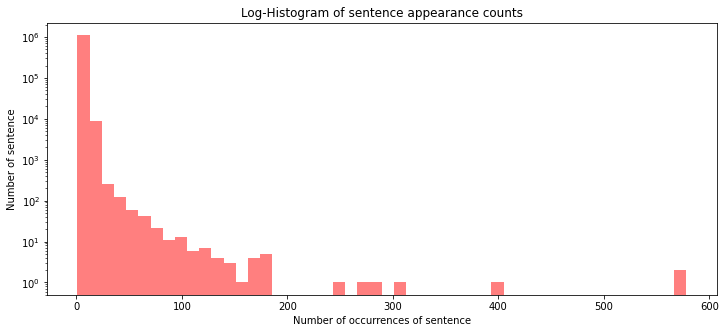

In [24]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of sentence appearance counts')

plt.xlabel('Number of occurrences of sentence')
plt.ylabel('Number of sentence')

In [25]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 578
중복 최소 개수: 1
중복 평균 개수: 1.69
중복 표준편차: 2.23
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 3.0


(위) 평균 중복이 1.69라는건 엄청 많은 데이터가 중복 됐음을 의미

(아래) 박스 플롯으로 중복 횟수를 시각화.

{'whiskers': [<matplotlib.lines.Line2D at 0x1aaf2d1e978>,
 'caps': [<matplotlib.lines.Line2D at 0x1aaf2d1eeb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aaf2d1e8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1aae97b94a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aae97b9a20>],
 'means': [<matplotlib.lines.Line2D at 0x1aae97b9780>]}

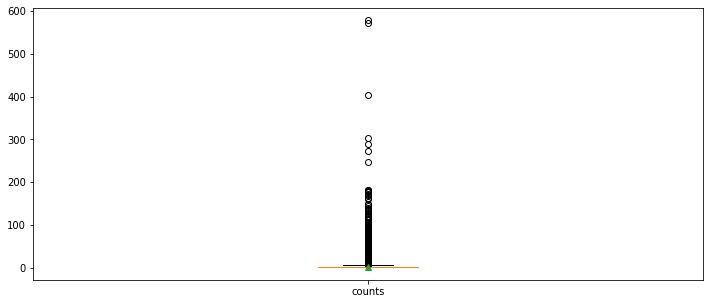

In [33]:
plt.figure(figsize=(12, 5))

plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)

In [29]:
train_length = train_set.apply(len)

1871292

In [31]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased", cache_dir = 'bert_ckpt', do_lower_case = False)

In [32]:
train_bert_token_counts = train_set.apply(lambda x:len(tokenizer.tokenize(x)))

Text(0, 0.5, 'Probability')

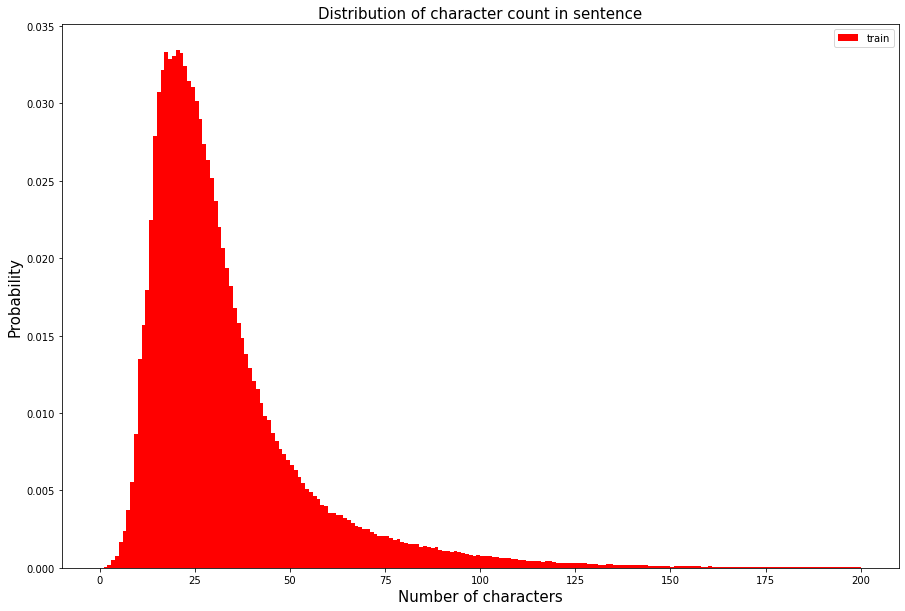

In [34]:
# 문장 길이 확인

plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Distribution of character count in sentence", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [36]:
print('문장 길이 최대 값: {}'.format(np.max(train_bert_token_counts)))
print('문장 길이 평균 값: {:.2f}'.format(np.mean(train_bert_token_counts)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(train_bert_token_counts)))
print('문장 길이 중간 값: {}'.format(np.median(train_bert_token_counts)))
print('문장 길이 제 1 사분위: {}'.format(np.percentile(train_bert_token_counts, 25)))
print('문장 길이 제 3 사분위: {}'.format(np.percentile(train_bert_token_counts, 75)))

문장 길이 최대 값: 9006
문장 길이 평균 값: 20.24
문장 길이 표준편차: 26.77
문장 길이 중간 값: 16.0
문장 길이 제 1 사분위: 11.0
문장 길이 제 3 사분위: 24.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1aae007be48>,
 'caps': [<matplotlib.lines.Line2D at 0x1aae00883c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aae007bda0>],
 'medians': [<matplotlib.lines.Line2D at 0x1aae0088978>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aae0088ef0>],
 'means': [<matplotlib.lines.Line2D at 0x1aae0088c50>]}

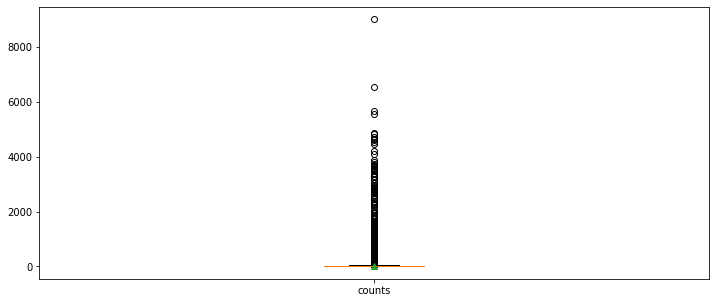

In [39]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_bert_token_counts,
             labels=['counts'],
             showmeans=True)

In [40]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

(-0.5, 799.5, 599.5, -0.5)

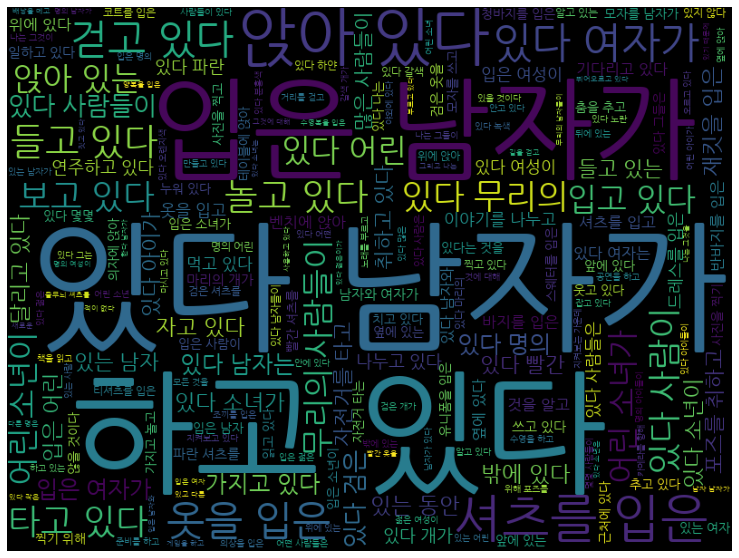

In [42]:
from wordcloud import WordCloud
dp = 'C:/nlp/tensorflow-ml-nlp-tf2/7.PRETRAIN_METHOD/data_in/KOR/'
font_path = 'NanumGothic.ttf'

cloud = WordCloud(font_path = dp + font_path, width = 800, height = 600).generate(" ".join(train_set.astype(str)))

plt.figure(figsize = (15,10))
plt.imshow(cloud)
plt.axis('off')

c:\users\lck11\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gold_label', ylabel='count'>

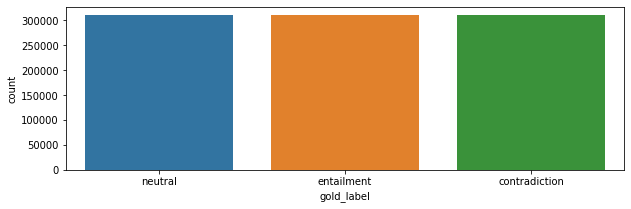

In [43]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(10, 3)
sns.countplot(train_data['gold_label'])